In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import torch
from LinearRegression import LinearRegression
plt.style.use("dark_background")

In [2]:
X,y=datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1234)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

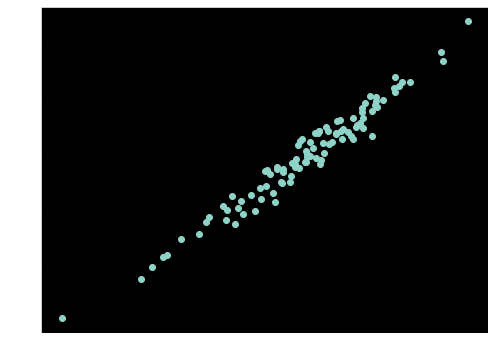

In [3]:
fig=plt.figure(figsize=(8,6))
plt.scatter(X[:,0],y)
plt.show()

In [4]:
lr=0.04
n_iters=250

In [5]:
n_samples,n_features=X_train.shape
print(n_samples,n_features)

80 1


In [6]:
weights=np.zeros(n_features)
weights

array([0.])

In [7]:
bias=0
X_train_t=X_train.T
var1=1/n_samples

In [8]:
for _ in range(n_iters):  
    a=[]     
    for i in X_train:    # np.dot(X, self.weights)
        t=np.dot(i,weights)
        a.append(t)

    a=np.array(a)

    y_pred=a+bias  # y_pred=np.dot(X, self.weights) + bias 

    r=y_pred-y_train

    p=[]
    for i in X_train_t:
        t=np.dot(i,r)
        p.append(t)
    
    p=np.array(p)
    dw=var1*p
    d=0
    for m in r:
        d+=m

    db=var1*d

    dw=dw*lr
    weights=weights-dw
    print(weights,_)

    db=db*lr
    bias=bias-db

[3.62290645] 0
[7.09561421] 1
[10.42435153] 2
[13.6150884] 3
[16.67354715] 4
[19.6052128] 5
[22.4153429] 6
[25.10897692] 7
[27.69094534] 8
[30.16587829] 9
[32.53821389] 10
[34.8122062] 11
[36.99193284] 12
[39.08130233] 13
[41.08406111] 14
[43.00380022] 15
[44.84396182] 16
[46.60784529] 17
[48.29861319] 18
[49.91929694] 19
[51.47280224] 20
[52.96191429] 21
[54.3893028] 22
[55.75752677] 23
[57.06903908] 24
[58.32619091] 25
[59.53123591] 26
[60.68633432] 27
[61.79355678] 28
[62.85488806] 29
[63.87223065] 30
[64.84740813] 31
[65.7821685] 32
[66.67818726] 33
[67.53707041] 34
[68.36035741] 35
[69.14952386] 36
[69.90598417] 37
[70.63109413] 38
[71.32615329] 39
[71.99240734] 40
[72.63105031] 41
[73.24322672] 42
[73.83003365] 43
[74.39252268] 44
[74.93170181] 45
[75.44853723] 46
[75.94395508] 47
[76.41884311] 48
[76.87405225] 49
[77.31039818] 50
[77.72866272] 51
[78.12959532] 52
[78.51391434] 53
[78.88230835] 54
[79.23543741] 55
[79.57393417] 56
[79.89840508] 57
[80.20943146] 58
[80.50757051] 5

In [9]:
bias

0.9205348721565981

In [10]:
weights

array([87.40436998])

#### testing:

predictions=X_test*weights+bias

In [11]:
X_test

array([[ 0.2477922 ],
       [-0.6365235 ],
       [ 0.46439233],
       [ 0.99194602],
       [-2.24268495],
       [ 0.55343891],
       [-0.89715678],
       [ 0.12471295],
       [ 0.28909194],
       [ 0.07619959],
       [-0.92625431],
       [ 0.70472062],
       [ 0.88716294],
       [ 0.70422823],
       [-0.34476601],
       [ 0.47143516],
       [ 1.03380073],
       [-1.40197328],
       [ 1.32110562],
       [ 0.84100879]])

In [12]:
type(X_test)

numpy.ndarray

In [13]:
predictions=(X_test*weights)+bias
predictions

array([[  22.57865598],
       [ -54.71440101],
       [  41.51045347],
       [  87.62095201],
       [-195.09993061],
       [  49.29351421],
       [ -77.49488864],
       [  11.82099202],
       [  26.18843384],
       [   7.58071184],
       [ -80.03813984],
       [  62.51619705],
       [  78.46245274],
       [  62.47315924],
       [ -29.21352139],
       [  42.12602834],
       [  91.27923659],
       [-121.61805653],
       [ 116.39093887],
       [  74.42837874]])

In [14]:
y_test

array([  -6.40043974,  -75.83288846,   43.02438483,   81.72162478,
       -197.98015036,   32.09705138, -102.66748012,   15.35071413,
          6.89232312,   26.28851288,  -80.36899984,   30.84591703,
         95.0686297 ,   69.43879729,  -45.80868283,   63.1880408 ,
         91.41603362, -108.37740214,  142.7546496 ,   87.77205622])

In [15]:
for a,b in zip(y_test,predictions):
    print(a,b)

-6.400439740897028 [22.57865598]
-75.83288846408419 [-54.71440101]
43.02438482670904 [41.51045347]
81.72162477765585 [87.62095201]
-197.9801503584435 [-195.09993061]
32.09705138165424 [49.29351421]
-102.66748011552487 [-77.49488864]
15.35071412820563 [11.82099202]
6.892323119468568 [26.18843384]
26.28851287900197 [7.58071184]
-80.36899984455164 [-80.03813984]
30.84591703151775 [62.51619705]
95.06862969774186 [78.46245274]
69.43879729019481 [62.47315924]
-45.80868282540775 [-29.21352139]
63.18804079600157 [42.12602834]
91.41603362148403 [91.27923659]
-108.37740214379002 [-121.61805653]
142.75464960351508 [116.39093887]
87.77205622112535 [74.42837874]


In [16]:
type(predictions)

numpy.ndarray

In [17]:
type(y_test)

numpy.ndarray

In [18]:
predictions.shape

(20, 1)

In [19]:
y_test.shape

(20,)

In [20]:
predictions=predictions.reshape(20,)
predictions.shape

(20,)

In [21]:
for a,b in zip(y_test,predictions):
    print(a,b)

-6.400439740897028 22.578655976995798
-75.83288846408419 -54.71440100854176
43.02438482670904 41.510453466513596
81.72162477765585 87.62095200862157
-197.9801503584435 -195.09993061076926
32.09705138165424 49.29351420643339
-102.66748011552487 -77.49488864456802
15.35071412820563 11.82099202454149
6.892323119468568 26.18843383964762
26.28851287900197 7.58071183976261
-80.36899984455164 -80.03813984268375
30.84591703151775 62.51619705210523
95.06862969774186 78.4624527388546
69.43879729019481 62.473159240411086
-45.80868282540775 -29.213521394090336
63.18804079600157 42.12602834434536
91.41603362148403 91.2792365854449
-108.37740214379002 -121.61805652542103
142.75464960351508 116.39093886861922
87.77205622112535 74.42837874029584


In [22]:
def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

mse = mse(y_test, predictions)
print(mse)

304.5084127953214


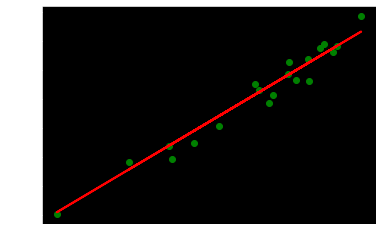

In [23]:
X_test_1=X_test.reshape(20,)
X_train_1=X_train.reshape(80,)
plt.plot(X_test_1, predictions, color='red', linewidth=2, label='Prediction')
plt.scatter(X_test_1, y_test, color='green')
plt.show()